In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('coronavirus_full_data.csv')

In [3]:
data

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,24-02-2020,Afghanistan,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,25-02-2020,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,26-02-2020,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,27-02-2020,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,28-02-2020,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
71532,27-02-2021,Zimbabwe,14.0,0.0,36058.0,1463.0,290.0,31.0,954.0,65.0
71533,28-02-2021,Zimbabwe,31.0,0.0,36089.0,1463.0,293.0,27.0,917.0,63.0
71534,01-03-2021,Zimbabwe,26.0,5.0,36115.0,1468.0,253.0,27.0,893.0,58.0
71535,02-03-2021,Zimbabwe,33.0,4.0,36148.0,1472.0,238.0,24.0,833.0,58.0


In [4]:
#Filling the null values with 0 as null values implies no cases under the given attribute as per our analysis
data=data.fillna(0)

In [5]:
#Converting dates into datetime for further analysis
data['Date']=pd.to_datetime(data['date'])

In [6]:
data['Date']

0       2020-02-24
1       2020-02-25
2       2020-02-26
3       2020-02-27
4       2020-02-28
           ...    
71532   2021-02-27
71533   2021-02-28
71534   2021-01-03
71535   2021-02-03
71536   2021-03-03
Name: Date, Length: 71537, dtype: datetime64[ns]

In [56]:
#Considering exactly one year data for our analysis 
data=data[(data['Date']>'2020-03-01')&(data['Date']<'2021-03-03')]
data

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,Date
8,03-03-2020,Afghanistan,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2020-03-03
9,04-03-2020,Afghanistan,2.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,2020-04-03
10,05-03-2020,Afghanistan,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,2020-05-03
11,06-03-2020,Afghanistan,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,2020-06-03
12,07-03-2020,Afghanistan,0.0,0.0,4.0,0.0,3.0,0.0,4.0,0.0,2020-07-03
...,...,...,...,...,...,...,...,...,...,...,...
71531,26-02-2021,Zimbabwe,50.0,5.0,36044.0,1463.0,334.0,33.0,999.0,70.0,2021-02-26
71532,27-02-2021,Zimbabwe,14.0,0.0,36058.0,1463.0,290.0,31.0,954.0,65.0,2021-02-27
71533,28-02-2021,Zimbabwe,31.0,0.0,36089.0,1463.0,293.0,27.0,917.0,63.0,2021-02-28
71534,01-03-2021,Zimbabwe,26.0,5.0,36115.0,1468.0,253.0,27.0,893.0,58.0,2021-01-03


In [62]:
data['date']=pd.to_datetime(data['date'])

In [63]:
data['date']

8       2020-03-03
9       2020-04-03
10      2020-05-03
11      2020-06-03
12      2020-07-03
           ...    
71531   2021-02-26
71532   2021-02-27
71533   2021-02-28
71534   2021-01-03
71535   2021-02-03
Name: date, Length: 63118, dtype: datetime64[ns]

In [64]:
#Transforming into months and days
data['month']=data['date'].dt.month_name()
data['day']=data['date'].dt.day_name()

In [65]:
data.describe()

,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
count,63118.000000,63118.000000,6.311800e+04,6.311800e+04,6.311800e+04,63118.000000,6.311800e+04,63118.000000
mean,4997.625907,112.209829,5.836808e+05,1.559740e+04,3.472379e+04,782.357505,6.862937e+04,1542.877325
std,31337.269409,654.514449,4.139194e+06,9.726282e+04,2.171567e+05,4468.870804,4.327929e+05,8848.277515
min,-74347.000000,-1918.000000,0.000000e+00,0.000000e+00,-3.124800e+04,-1625.000000,-9.050000e+02,-1616.000000
25%,2.000000,0.000000,7.210000e+02,1.000000e+01,3.700000e+01,0.000000,7.300000e+01,0.000000
50%,58.000000,1.000000,7.467000e+03,1.250000e+02,4.560000e+02,7.000000,8.760000e+02,13.000000
75%,648.000000,11.000000,7.973425e+04,1.546000e+03,4.569750e+03,80.000000,8.909500e+03,157.000000
max,765090.000000,17886.000000,1.147259e+08,2.548620e+06,5.102875e+06,100897.000000,9.867994e+06,197727.000000


In [66]:
#Since last date for the dataset is 3rd march 2021, comparitive studies can be done by analysing cumulative total cases
#and total deaths for each country
last_Day=data.loc[data['date'] == '2021-03-03'].sort_values(by='total_cases',ascending=False)
last_Day.head(25) 
last_day_top5_Cases = last_Day[last_Day.location.isin(['United States','India','Brazil','Russia','United Kingdom'])]
last_day_top5_Deaths=last_Day[last_Day.location.isin(['United States','India','Brazil','Mexico','United Kingdom'])]
last_day_top5_Cases['total_deaths'].sum()/last_Day[last_Day.location.isin(['World'])]['total_deaths']
#last_day_top5_Cases['total_cases'].sum()/last_Day[last_Day.location.isin(['World'])]['total_cases']


Series([], Name: total_deaths, dtype: float64)

In [67]:
data[['total_cases','location']].loc[data['date'] == '2021-03-03']

,total_cases,location


In [68]:
import calendar

In [86]:
#Top 4 most impacted continents:Europe,NA,SA,Asia
Europe=pd.DataFrame(data.loc[data['location']=='Europe'])
NorthAmer=pd.DataFrame(data.loc[data['location']=='North America'])
Asia=pd.DataFrame(data.loc[data['location']=='Asia'])
SouthAmer=pd.DataFrame(data.loc[data['location']=='South America'])
World=pd.DataFrame(data.loc[data['location']=='World'])
Africa=pd.DataFrame(data.loc[data['location']=='Africa'])
overall=pd.concat([Europe,NorthAmer,Asia,SouthAmer])
continents=pd.concat([Europe,NorthAmer,Asia,SouthAmer,Africa])
#continents['month']=continents['date'].dt.month_name()
data.loc[data['location']=='World']
continents['weeks']=continents['date'].dt.week
continents

<ipython-input-86-f9facf3b5ae9>:12: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,Date,month,day,weeks
21865,2020-03-02,Europe,8.0,0.0,33.0,0.0,29.0,0.0,0.0,0.0,2020-03-02,March,Monday,10
21866,2020-04-02,Europe,1.0,0.0,34.0,0.0,26.0,0.0,0.0,0.0,2020-04-02,April,Thursday,14
21867,2020-05-02,Europe,1.0,0.0,35.0,0.0,25.0,0.0,35.0,0.0,2020-05-02,May,Saturday,18
21868,2020-06-02,Europe,0.0,0.0,35.0,0.0,25.0,0.0,35.0,0.0,2020-06-02,June,Tuesday,23
21869,2020-07-02,Europe,2.0,0.0,37.0,0.0,20.0,0.0,35.0,0.0,2020-07-02,July,Thursday,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2021-02-26,Africa,11103.0,317.0,3880062.0,103142.0,69739.0,2433.0,148127.0,5312.0,2021-02-26,February,Friday,8
754,2021-02-27,Africa,7831.0,339.0,3887893.0,103481.0,68011.0,2482.0,145044.0,5299.0,2021-02-27,February,Saturday,8
755,2021-02-28,Africa,9414.0,225.0,3897307.0,103706.0,67905.0,2370.0,144133.0,5231.0,2021-02-28,February,Sunday,8
756,2021-01-03,Africa,8833.0,315.0,3906140.0,104021.0,67721.0,2349.0,143073.0,5075.0,2021-01-03,January,Sunday,53


In [87]:
#Top 5 most impacted countries wrt total cases
US=pd.DataFrame(data.loc[data['location']=='United States'])
India=pd.DataFrame(data.loc[data['location']=='India'])
Brazil=pd.DataFrame(data.loc[data['location']=='Brazil'])
Russia=pd.DataFrame(data.loc[data['location']=='Russia'])
UK=pd.DataFrame(data.loc[data['location']=='United Kingdom'])
Top_Cases=pd.concat([US,India,Brazil,Russia,UK])

In [88]:
#Top 5 most impacted countries wrt total deaths (US,Brazil,Mexico,India,UK)
US=pd.DataFrame(data.loc[data['location']=='United States'])
Brazil=pd.DataFrame(data.loc[data['location']=='Brazil'])
Mexico=pd.DataFrame(data.loc[data['location']=='Mexico'])
India=pd.DataFrame(data.loc[data['location']=='India'])
UK=pd.DataFrame(data.loc[data['location']=='United Kingdom'])
Top_Death=pd.concat([US,Brazil,Mexico,India,UK])

In [89]:
#Next 5 countries wrt total deaths (Africa,Italy,France,Russia,Germany)
Africa=pd.DataFrame(data.loc[data['location']=='Africa'])
Italy=pd.DataFrame(data.loc[data['location']=='Italy'])
France=pd.DataFrame(data.loc[data['location']=='France'])
Russia=pd.DataFrame(data.loc[data['location']=='Russia'])
Germany=pd.DataFrame(data.loc[data['location']=='Germany'])
Next_Death=pd.concat([Africa,Italy,France,Russia,Germany])

In [90]:
#Next 5 impacted countries wrt total cases
Africa=pd.DataFrame(data.loc[data['location']=='Africa'])
France=pd.DataFrame(data.loc[data['location']=='France'])
Spain=pd.DataFrame(data.loc[data['location']=='Spain'])
Italy=pd.DataFrame(data.loc[data['location']=='Italy'])
Turkey=pd.DataFrame(data.loc[data['location']=='Turkey'])
Next_Cases= pd.concat([Africa,France,Spain,Italy,Turkey])
Next_Cases

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,Date,month,day
393,2020-03-03,Africa,3.0,0.0,11.0,0.0,9.0,0.0,10.0,0.0,2020-03-03,March,Tuesday
394,2020-04-03,Africa,10.0,0.0,21.0,0.0,19.0,0.0,20.0,0.0,2020-04-03,April,Friday
395,2020-05-03,Africa,3.0,0.0,24.0,0.0,22.0,0.0,23.0,0.0,2020-05-03,May,Sunday
396,2020-06-03,Africa,19.0,0.0,43.0,0.0,40.0,0.0,42.0,0.0,2020-06-03,June,Wednesday
397,2020-07-03,Africa,0.0,0.0,43.0,0.0,40.0,0.0,42.0,0.0,2020-07-03,July,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66229,2021-02-26,Turkey,9205.0,74.0,2683971.0,28432.0,59952.0,529.0,111781.0,1148.0,2021-02-26,February,Friday
66230,2021-02-27,Turkey,9193.0,71.0,2693164.0,28503.0,61288.0,520.0,113268.0,1126.0,2021-02-27,February,Saturday
66231,2021-02-28,Turkey,8424.0,66.0,2701588.0,28569.0,63166.0,509.0,115405.0,1098.0,2021-02-28,February,Sunday
66232,2021-01-03,Turkey,9891.0,69.0,2711479.0,28638.0,64953.0,500.0,117351.0,1076.0,2021-01-03,January,Sunday


In [91]:
Cross_Count=pd.concat([Top_Cases,Next_Cases,Top_Death,Next_Death],axis=1)

In [92]:
#Cross country comparison done by grouping new cases and deaths by months,both are skewed
Cross_Count['new_cases'].skew()

new_cases    2.856919
new_cases    1.926466
new_cases    2.820754
new_cases    1.608788
dtype: float64

In [93]:
Cross_Count['new_deaths'].skew()

new_deaths    2.191113
new_deaths    1.219087
new_deaths    2.069571
new_deaths    1.544293
dtype: float64

To prove there is statistically significant difference between cases and deaths of both the groups (Top5,Next5), kruskal wallis test is performed which is a non parametric test and low p values confirm our hypothesis.

In [94]:

stats.kruskal(Top_Death['new_deaths'],Next_Death['new_deaths']) ## Very significant difference

KruskalResult(statistic=490.4353595631082, pvalue=1.1457316774091135e-108)

In [95]:
stats.kruskal(Top_Cases['new_cases'],Next_Cases['new_cases']) ##Very significant difference

KruskalResult(statistic=492.0543600394494, pvalue=5.091065255136768e-109)

In [96]:
Top_Cases_1=Top_Cases[(Top_Cases['date'] > '2020-03-03') & (Top_Cases['date'] < '2021-02-27')]

# Visualisations Per Component

In [97]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Correlation between attributes

<AxesSubplot:>

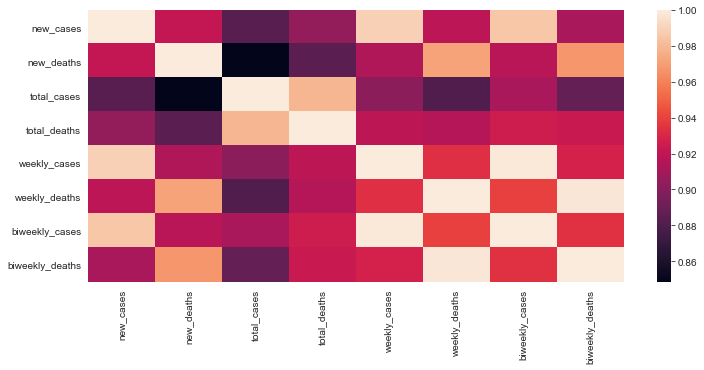

In [98]:

plt.figure(figsize=(12,5))
sns.heatmap(data.corr())

Correlation between atrributes of the entire dataset; it can be seen that cases and deaths have very high correlation with each other suggesting that higher cases most probably lead to high mortality and that the chances of revival post being infected was lesser during the period of analysis. Therefore, in order to curb the mortality rates, measures should be taken to curb the amount of cases via stringent lockdown.

# Continent Wise Analysis

In [99]:
#Used plotly for interactive visualisation
import plotly.express as px
px.area(continents,x='date',y='weekly_cases',color='location',title='Weekly Cases for Continents')

In [105]:
import plotly.express as px
px.area(continents,x='date',y='weekly_deaths',color='location',title='Weekly Deaths for Continents')

Text(0.5, 1.0, 'Monthly Deaths Around the World')

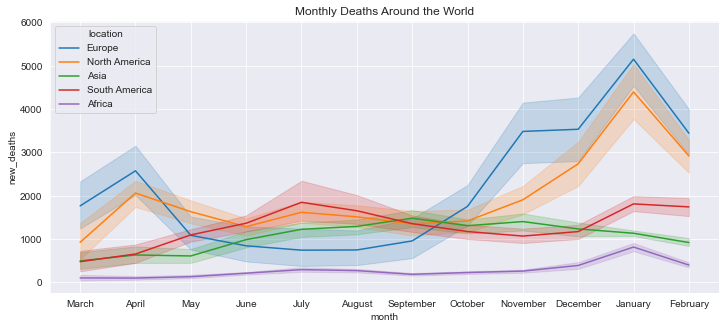

In [108]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='new_deaths',data=continents,hue='location')
plt.title('Monthly Deaths Around the World')

Text(0.5, 1.0, 'Monthly Cases Around the World')

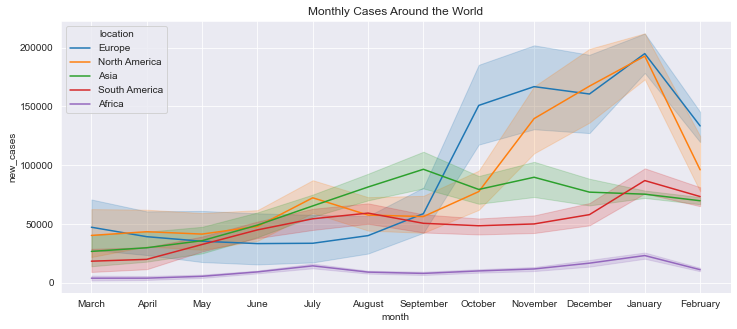

In [107]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='new_cases',data=continents,hue='location')
plt.title('Monthly Cases Around the World')

Owing to high correlation between deaths and cases, similar trend can be observed for cases and deaths on monthwise basis with Europe and North America peaking relative to other continents from october to January, thereby falling. This is followed by Asia in terms of impact on cases

# Cross Country Comparison

In [109]:
#Taken Data between 1st march 2020 to 2nd march 2021
Top_Death_1=Top_Death[(Top_Death['date'] > '2020-03-01')&(Top_Death['date'] < '2021-03-02')]
Next_Death_1=Next_Death[(Next_Death['date'] > '2020-03-01')&(Next_Death['date'] < '2021-03-02')]
Top_Cases_1=Top_Cases[(Top_Cases['date'] > '2020-03-01')&(Top_Cases['date'] < '2021-03-02')]
Next_Cases_1=Next_Cases[(Next_Cases['date'] > '2020-03-01')&(Next_Cases['date'] < '2021-03-02')]

In [112]:
#Cases=Top_Death_1[Top_Death_1['location']=='United Kingdom']
#July[July['month']=='July']['new_cases'].mean()
#April=Top_Cases_1[Top_Cases_1['location']=='United States']
#Cases[Cases['month']=='February']['new_deaths'].mean()

# Country-Wise

# Death Cases

Text(0, 0.5, 'Daily Deaths')

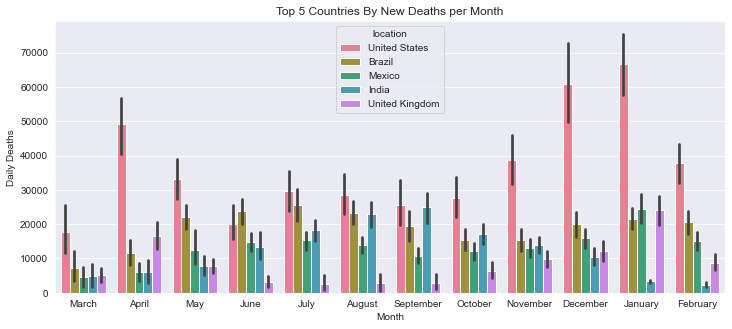

In [115]:
plt.figure(figsize=(12,5))
sns.barplot(x='month',y='new_deaths',data=Top_Death_1,hue='location',palette='husl',estimator=sum)
plt.title('Top 5 Countries By New Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Daily Deaths')

Text(0, 0.5, 'Daily Deaths')

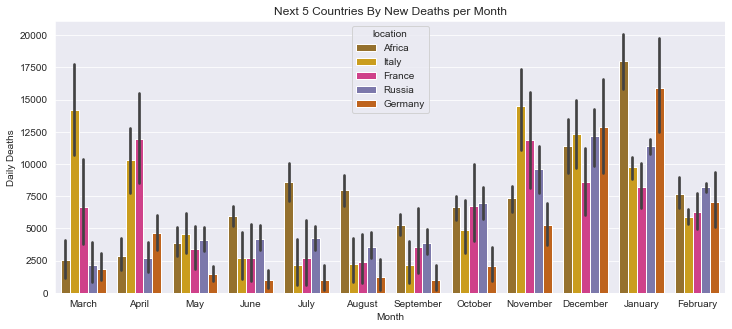

In [116]:
plt.figure(figsize=(12,5))
sns.barplot(x='month',y='new_deaths',data=Next_Death_1,hue='location',estimator=sum,palette='Dark2_r')
plt.title('Next 5 Countries By New Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Daily Deaths')


# Total Cases

Text(0, 0.5, 'Daily Cases')

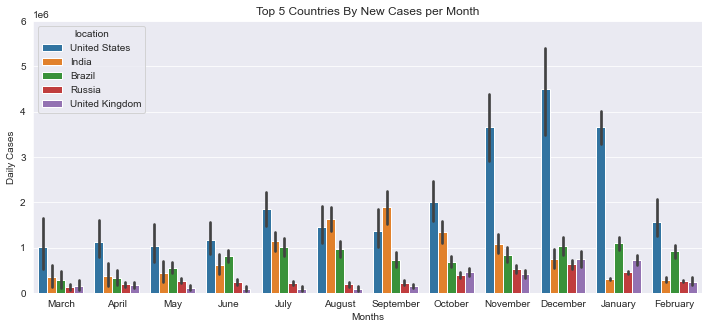

In [117]:
plt.figure(figsize=(12,5))
sns.barplot(x='month',y='new_cases',data=Top_Cases_1,hue='location',estimator=sum)
plt.title('Top 5 Countries By New Cases per Month')
#plt.ticklabel_format(useOffset=False, style='plain') 
plt.ylim(0,6000000)
plt.xlabel('Months')
plt.ylabel('Daily Cases')

Text(0, 0.5, 'Daily Cases')

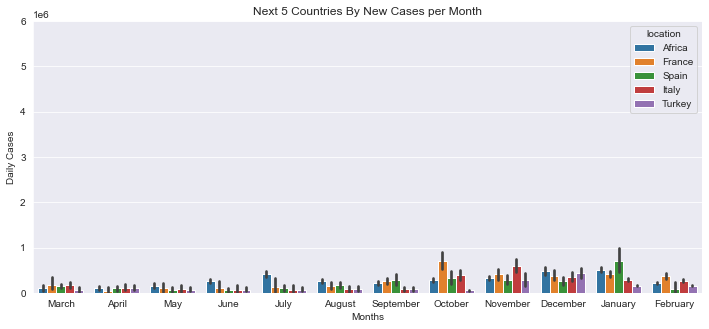

In [118]:
plt.figure(figsize=(12,5))
sns.barplot(x='month',y='new_cases',data=Next_Cases_1,hue='location',estimator=sum)
plt.title('Next 5 Countries By New Cases per Month')
plt.ylim(0,6000000)
plt.xlabel('Months')
plt.ylabel('Daily Cases')

In [120]:
#plt.figure(figsize=(17,5))
#sns.swarmplot(x='location',y='new_cases',data=Top_Cases,size=3)

# Top 5 Countries wrt Deaths and Cases

FOCUSSING ON RATE OF INCREMENT IN DEATH AND CASES VIA NEW CASES: WAVE ANALYSIS

Text(0, 0.5, 'Daily Cases')

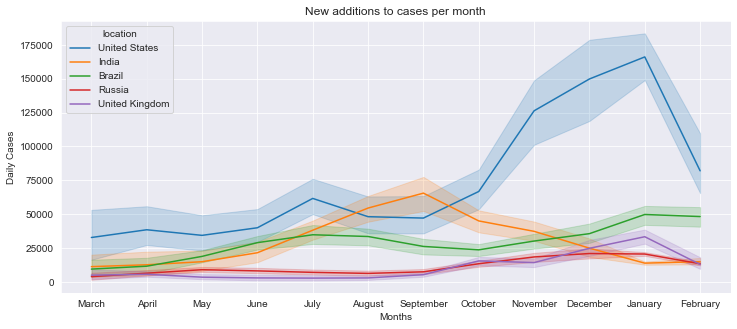

In [123]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='new_cases',data=Top_Cases_1,hue='location')
plt.title('New additions to cases per month') 
plt.xlabel('Months')
plt.ylabel('Daily Cases')                          
#Shows worst impacted country wrt death ratesShows worst impacted country wrt transmission

Text(0, 0.5, 'Daily Deaths')

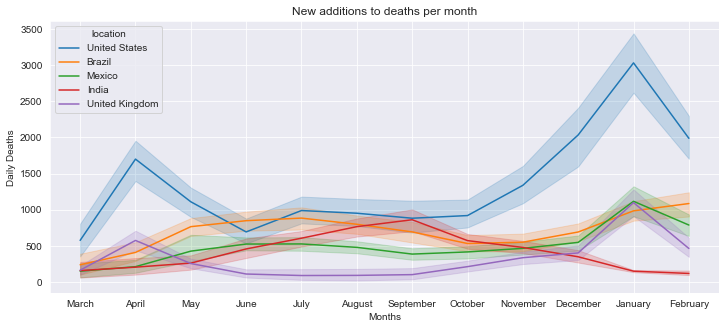

In [178]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='new_deaths',data=Top_Death_1,hue='location')
plt.title('New additions to deaths per month') 
plt.xlabel('Months')
plt.ylabel('Daily Deaths')                          #Shows worst impacted country wrt death rates

India had witnessed only 1 wave, peaking at the month of September while US witnessed 2 waves, peaks at the month of

# Overview of Macro Level

In [171]:
#As on last date of analysis
viz=continents[continents['date']=='2021-02-03']
viz

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,Date,month,day,weeks
22258,2021-02-03,Europe,68329.0,3725.0,34501980.0,821285.0,941363.0,21608.0,1877935.0,45768.0,2021-02-03,February,Wednesday,5
47264,2021-02-03,North America,72469.0,3065.0,32997322.0,751405.0,554356.0,19745.0,1129206.0,40521.0,2021-02-03,February,Wednesday,5
3703,2021-02-03,Asia,76550.0,883.0,25167741.0,400366.0,510895.0,6592.0,985466.0,12558.0,2021-02-03,February,Wednesday,5
59602,2021-02-03,South America,85389.0,2372.0,18111492.0,470214.0,568485.0,13194.0,1080584.0,25539.0,2021-02-03,February,Wednesday,5
757,2021-02-03,Africa,7708.0,363.0,3913848.0,104384.0,67689.0,2242.0,140754.0,4972.0,2021-02-03,February,Wednesday,5


<AxesSubplot:xlabel='location', ylabel='total_cases'>

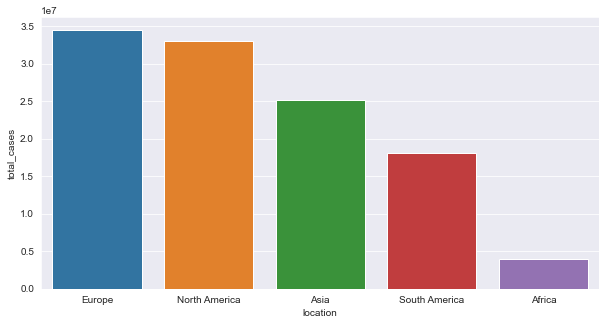

In [176]:
plt.figure(figsize=(10,5))
sns.barplot(x='location',y='total_cases',data=viz)

<AxesSubplot:xlabel='location', ylabel='total_deaths'>

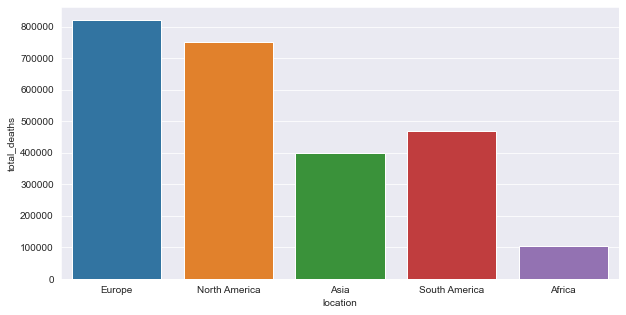

In [177]:
plt.figure(figsize=(10,5))
sns.barplot(x='location',y='total_deaths',data=viz)

As on last date of the analysis, in terms of cumulative statistics over 1 year,Europe and North America leads the cases and deaths while Total deaths in South America is higher than Asia contrary to Cases.